In [1]:
import sys
sys.path.append('..')
import ugent
from pyslise import Pyslise


p1 = Pyslise(lambda x: (x-1)**2, -4, 4)
p2 = Pyslise(lambda x: (x+1)**2, -4, 4)

y0 = (0, 1)
eigs1 = p1.eigenpairsByIndex(0, 1000, y0, y0)
eigs2 = p2.eigenpairsByIndex(0, 1000, y0, y0)

In [2]:
import numpy as np
from tqdm.notebook import tqdm
from pqdm.processes import pqdm
from scipy.integrate import simpson

x = np.linspace(-8, 8, 200000)
dx = x[1] - x[0]

def normalize(f):
    assert abs(1 - dx*np.dot(f, f)) < 1e-6
    return f

def evaluate(iEf):
    i, E, f = iEf
    return normalize(f(x)[0])

fs1 = np.array(list(map(evaluate, tqdm(eigs1))))
fs2 = np.array(list(map(evaluate, tqdm(eigs2))))

M = fs2 @ fs1.T
M *= dx
M.shape

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

(1000, 1000)

In [3]:
ns = []
r = []
f = 1.11
for i in range(1, 1+int(np.log(len(eigs1))/np.log(f))):
    n = int(f**i)
    if n >= len(eigs1):
        break
    ns.append(n)
    m = M[:n, :n]
    r.append(np.linalg.norm(m @ m.T - np.eye(n), ord=2))
print(ns)

[1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 4, 4, 5, 5, 6, 7, 8, 8, 9, 11, 12, 13, 15, 16, 18, 20, 22, 25, 28, 31, 34, 38, 42, 47, 52, 58, 65, 72, 80, 88, 98, 109, 121, 134, 149, 166, 184, 204, 227, 252, 280, 311, 345, 383, 425, 472, 524, 581, 645, 716, 795, 883, 980]


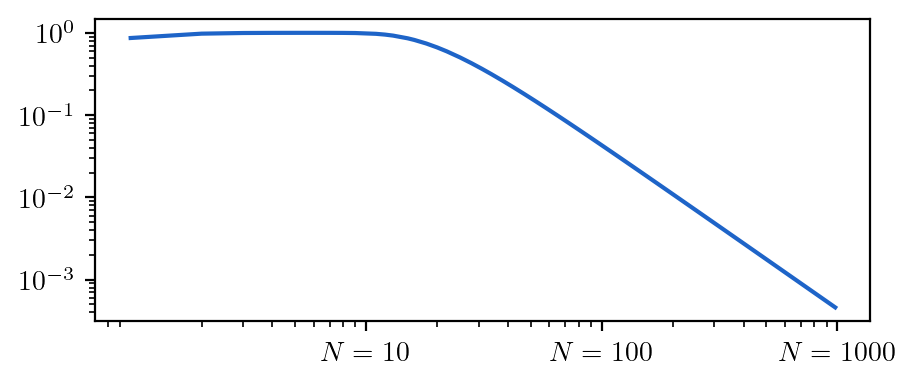

In [5]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1, dpi=200, figsize=(5, 2))

ax.loglog(ns, r, color=ugent.blauw)
ax.set_xticks([10, 100, 1000])
ax.set_xticklabels(["$N=10$", "$N=100$", "$N=1000$"])

plt.savefig('orthogonal_m.pdf', bbox_inches="tight")